# Astronomical Objects Classification using CNN'S

Classification of variable astronomical objects using ‘image stamps’ around the position of astronomical alerts produced by the ZTF survey.

PART 1:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle("/content/drive/MyDrive/AS4501_homework3_training_set.pkl")

In [4]:
df.head()

,class,oid,cutoutScience,cutoutTemplate,cutoutDifference,sgscore1,distpsnr1,sgscore2,distpsnr2,sgscore3,distpsnr3,isdiffpos
0,SN,ZTF18acqyvag,b'\x1f\x8b\x08\x00\xc2Q\xf5[\x02\x03\xed\xbbW\...,b'\x1f\x8b\x08\x00\xc2Q\xf5[\x02\x03\xed\x9bU\...,b'\x1f\x8b\x08\x00\xc2Q\xf5[\x02\x03\xed\xb7iX...,0.000833,13.407900,0.005042,20.248602,0.079559,22.417665,t
1,SN,ZTF19aarphwc,b'\x1f\x8b\x08\x00X\xc7\xca\\\x02\x03\xed\xbaU...,b'\x1f\x8b\x08\x00X\xc7\xca\\\x02\x03\xed\x9bU...,b'\x1f\x8b\x08\x00X\xc7\xca\\\x02\x03\xed\xb7i...,0.761167,14.532326,0.990107,15.556331,0.567958,19.342962,t
2,SN,ZTF18acenqto,b'\x1f\x8b\x08\x00\x86\xf8\xe3[\x02\x03\xed\x9...,b'\x1f\x8b\x08\x00\x86\xf8\xe3[\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\x86\xf8\xe3[\x02\x03\xed\xb...,0.015167,4.934814,0.982083,20.565067,0.989375,23.472559,t
3,SN,ZTF18acxgqxq,b'\x1f\x8b\x08\x00\xbb\x0b\x17\\\x02\x03\xed\x...,b'\x1f\x8b\x08\x00\xbb\x0b\x17\\\x02\x03\xed\x...,b'\x1f\x8b\x08\x00\xba\x0b\x17\\\x02\x03\xed\x...,0.987042,7.957039,0.994833,13.217311,0.956458,13.472185,t
4,SN,ZTF18abshezu,b'\x1f\x8b\x08\x00\xc2\xb8\x8b[\x02\x03\xed\xb...,b'\x1f\x8b\x08\x00\xc2\xb8\x8b[\x02\x03\xed\x9...,b'\x1f\x8b\x08\x00\xc2\xb8\x8b[\x02\x03\xed\xb...,0.004792,24.373383,0.966643,25.371384,-999.000000,-999.000000,t


In [5]:
np.shape(df)

(36262, 12)

In [6]:
df.columns

Index(['class', 'oid', 'cutoutScience', 'cutoutTemplate', 'cutoutDifference',
       'sgscore1', 'distpsnr1', 'sgscore2', 'distpsnr2', 'sgscore3',
       'distpsnr3', 'isdiffpos'],
      dtype='object')

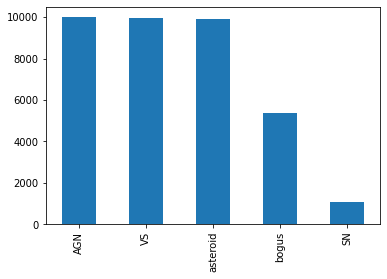

In [7]:
pd.value_counts(df["class"]).plot.bar()

PART 2:

In [8]:
import io, gzip
from astropy.io import fits

def get_image_from_bytes_stamp(stamp_byte):
  with gzip.open(io.BytesIO(stamp_byte), 'rb') as f:
    with fits.open(io.BytesIO(f.read()),ignore_missing_simple=True) as hdul:
      img = hdul[0].data
  return img

In [9]:
df1 = df.copy()

In [10]:
df1["cutoutScience"] = df1["cutoutScience"].apply(get_image_from_bytes_stamp)
df1["cutoutTemplate"] = df1["cutoutTemplate"].apply(get_image_from_bytes_stamp)
df1["cutoutDifference"] = df1["cutoutDifference"].apply(get_image_from_bytes_stamp)

In [11]:
agn = df1.loc[df1["class"] == "AGN"].sample(10)
vs = df1.loc[df1["class"] == "VS"].sample(10)
asteroid = df1.loc[df1["class"] == "asteroid"].sample(10)
bogus = df1.loc[df1["class"] == "bogus"].sample(10)
sn = df1.loc[df1["class"] == "SN"].sample(10)

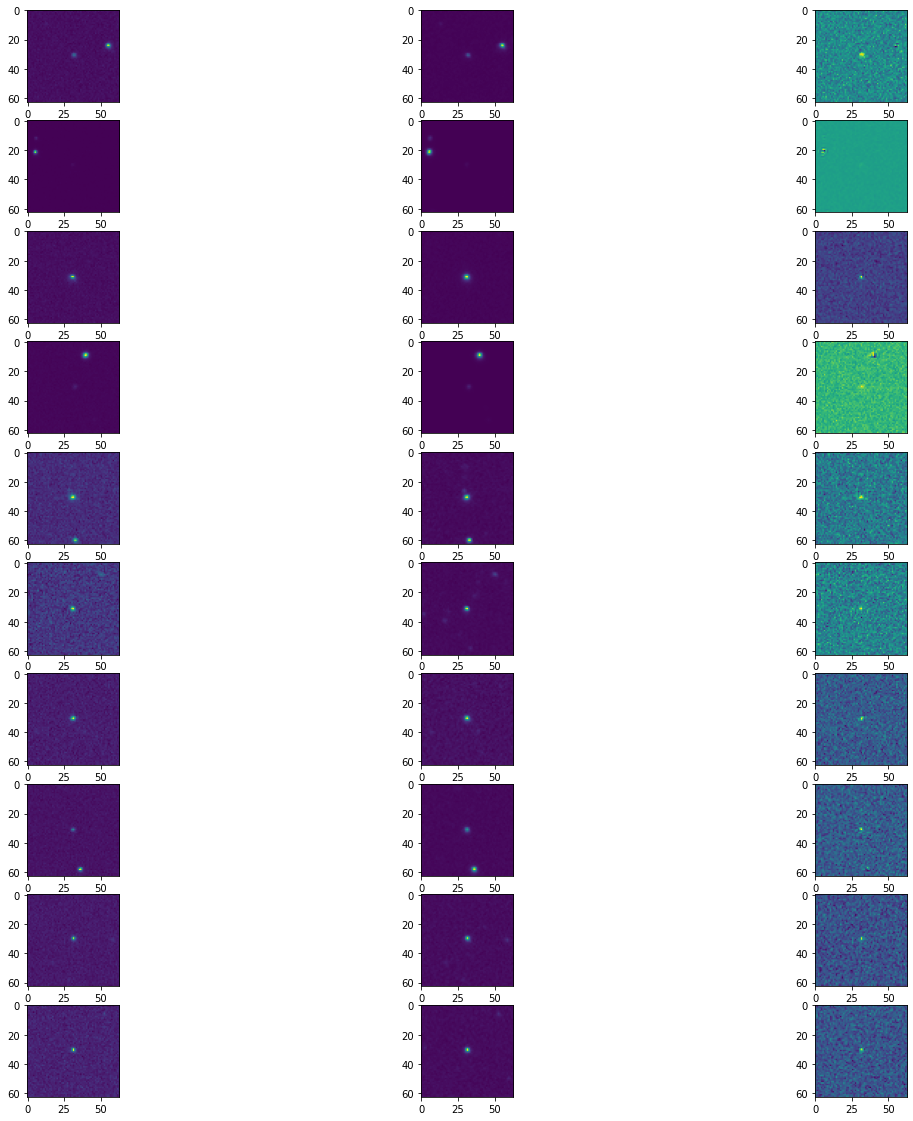

In [12]:
fig, ax = plt.subplots(ncols=3, nrows=10, figsize=(20, 20))
ax[0, 0].imshow(agn["cutoutScience"].values[0])
ax[1, 0].imshow(agn["cutoutScience"].values[1])
ax[2, 0].imshow(agn["cutoutScience"].values[2])
ax[3, 0].imshow(agn["cutoutScience"].values[3])
ax[4, 0].imshow(agn["cutoutScience"].values[4])
ax[5, 0].imshow(agn["cutoutScience"].values[5])
ax[6, 0].imshow(agn["cutoutScience"].values[6])
ax[7, 0].imshow(agn["cutoutScience"].values[7])
ax[8, 0].imshow(agn["cutoutScience"].values[8])
ax[9, 0].imshow(agn["cutoutScience"].values[9])
ax[0, 1].imshow(agn["cutoutTemplate"].values[0])
ax[1, 1].imshow(agn["cutoutTemplate"].values[1])
ax[2, 1].imshow(agn["cutoutTemplate"].values[2])
ax[3, 1].imshow(agn["cutoutTemplate"].values[3])
ax[4, 1].imshow(agn["cutoutTemplate"].values[4])
ax[5, 1].imshow(agn["cutoutTemplate"].values[5])
ax[6, 1].imshow(agn["cutoutTemplate"].values[6])
ax[7, 1].imshow(agn["cutoutTemplate"].values[7])
ax[8, 1].imshow(agn["cutoutTemplate"].values[8])
ax[9, 1].imshow(agn["cutoutTemplate"].values[9])
ax[0, 2].imshow(agn["cutoutDifference"].values[0])
ax[1, 2].imshow(agn["cutoutDifference"].values[1])
ax[2, 2].imshow(agn["cutoutDifference"].values[2])
ax[3, 2].imshow(agn["cutoutDifference"].values[3])
ax[4, 2].imshow(agn["cutoutDifference"].values[4])
ax[5, 2].imshow(agn["cutoutDifference"].values[5])
ax[6, 2].imshow(agn["cutoutDifference"].values[6])
ax[7, 2].imshow(agn["cutoutDifference"].values[7])
ax[8, 2].imshow(agn["cutoutDifference"].values[8])
ax[9, 2].imshow(agn["cutoutDifference"].values[9])

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:488: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / 0.8)


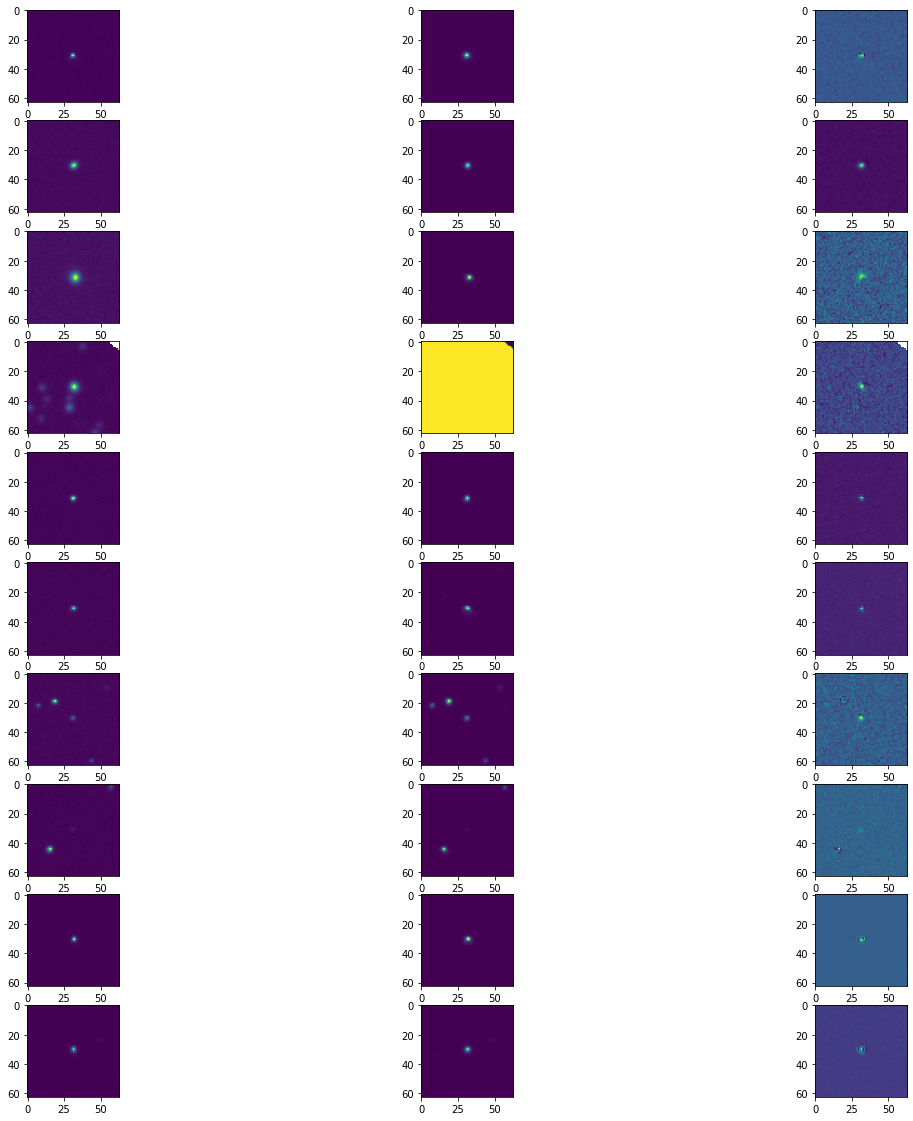

In [13]:
fig, ax = plt.subplots(ncols=3, nrows=10, figsize=(20, 20))
ax[0, 0].imshow(vs["cutoutScience"].values[0])
ax[1, 0].imshow(vs["cutoutScience"].values[1])
ax[2, 0].imshow(vs["cutoutScience"].values[2])
ax[3, 0].imshow(vs["cutoutScience"].values[3])
ax[4, 0].imshow(vs["cutoutScience"].values[4])
ax[5, 0].imshow(vs["cutoutScience"].values[5])
ax[6, 0].imshow(vs["cutoutScience"].values[6])
ax[7, 0].imshow(vs["cutoutScience"].values[7])
ax[8, 0].imshow(vs["cutoutScience"].values[8])
ax[9, 0].imshow(vs["cutoutScience"].values[9])
ax[0, 1].imshow(vs["cutoutTemplate"].values[0])
ax[1, 1].imshow(vs["cutoutTemplate"].values[1])
ax[2, 1].imshow(vs["cutoutTemplate"].values[2])
ax[3, 1].imshow(vs["cutoutTemplate"].values[3])
ax[4, 1].imshow(vs["cutoutTemplate"].values[4])
ax[5, 1].imshow(vs["cutoutTemplate"].values[5])
ax[6, 1].imshow(vs["cutoutTemplate"].values[6])
ax[7, 1].imshow(vs["cutoutTemplate"].values[7])
ax[8, 1].imshow(vs["cutoutTemplate"].values[8])
ax[9, 1].imshow(vs["cutoutTemplate"].values[9])
ax[0, 2].imshow(vs["cutoutDifference"].values[0])
ax[1, 2].imshow(vs["cutoutDifference"].values[1])
ax[2, 2].imshow(vs["cutoutDifference"].values[2])
ax[3, 2].imshow(vs["cutoutDifference"].values[3])
ax[4, 2].imshow(vs["cutoutDifference"].values[4])
ax[5, 2].imshow(vs["cutoutDifference"].values[5])
ax[6, 2].imshow(vs["cutoutDifference"].values[6])
ax[7, 2].imshow(vs["cutoutDifference"].values[7])
ax[8, 2].imshow(vs["cutoutDifference"].values[8])
ax[9, 2].imshow(vs["cutoutDifference"].values[9])

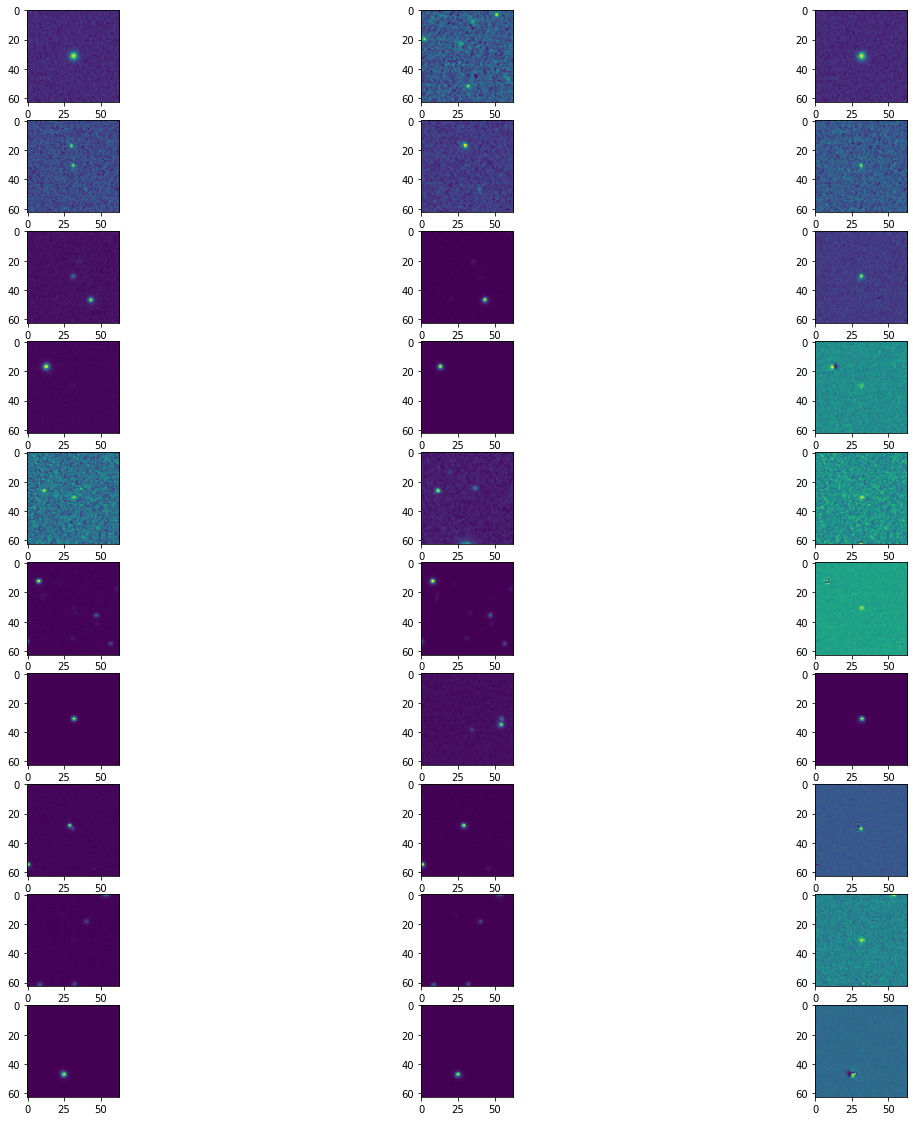

In [14]:
fig, ax = plt.subplots(ncols=3, nrows=10, figsize=(20, 20))
ax[0, 0].imshow(asteroid["cutoutScience"].values[0])
ax[1, 0].imshow(asteroid["cutoutScience"].values[1])
ax[2, 0].imshow(asteroid["cutoutScience"].values[2])
ax[3, 0].imshow(asteroid["cutoutScience"].values[3])
ax[4, 0].imshow(asteroid["cutoutScience"].values[4])
ax[5, 0].imshow(asteroid["cutoutScience"].values[5])
ax[6, 0].imshow(asteroid["cutoutScience"].values[6])
ax[7, 0].imshow(asteroid["cutoutScience"].values[7])
ax[8, 0].imshow(asteroid["cutoutScience"].values[8])
ax[9, 0].imshow(asteroid["cutoutScience"].values[9])
ax[0, 1].imshow(asteroid["cutoutTemplate"].values[0])
ax[1, 1].imshow(asteroid["cutoutTemplate"].values[1])
ax[2, 1].imshow(asteroid["cutoutTemplate"].values[2])
ax[3, 1].imshow(asteroid["cutoutTemplate"].values[3])
ax[4, 1].imshow(asteroid["cutoutTemplate"].values[4])
ax[5, 1].imshow(asteroid["cutoutTemplate"].values[5])
ax[6, 1].imshow(asteroid["cutoutTemplate"].values[6])
ax[7, 1].imshow(asteroid["cutoutTemplate"].values[7])
ax[8, 1].imshow(asteroid["cutoutTemplate"].values[8])
ax[9, 1].imshow(asteroid["cutoutTemplate"].values[9])
ax[0, 2].imshow(asteroid["cutoutDifference"].values[0])
ax[1, 2].imshow(asteroid["cutoutDifference"].values[1])
ax[2, 2].imshow(asteroid["cutoutDifference"].values[2])
ax[3, 2].imshow(asteroid["cutoutDifference"].values[3])
ax[4, 2].imshow(asteroid["cutoutDifference"].values[4])
ax[5, 2].imshow(asteroid["cutoutDifference"].values[5])
ax[6, 2].imshow(asteroid["cutoutDifference"].values[6])
ax[7, 2].imshow(asteroid["cutoutDifference"].values[7])
ax[8, 2].imshow(asteroid["cutoutDifference"].values[8])
ax[9, 2].imshow(asteroid["cutoutDifference"].values[9])

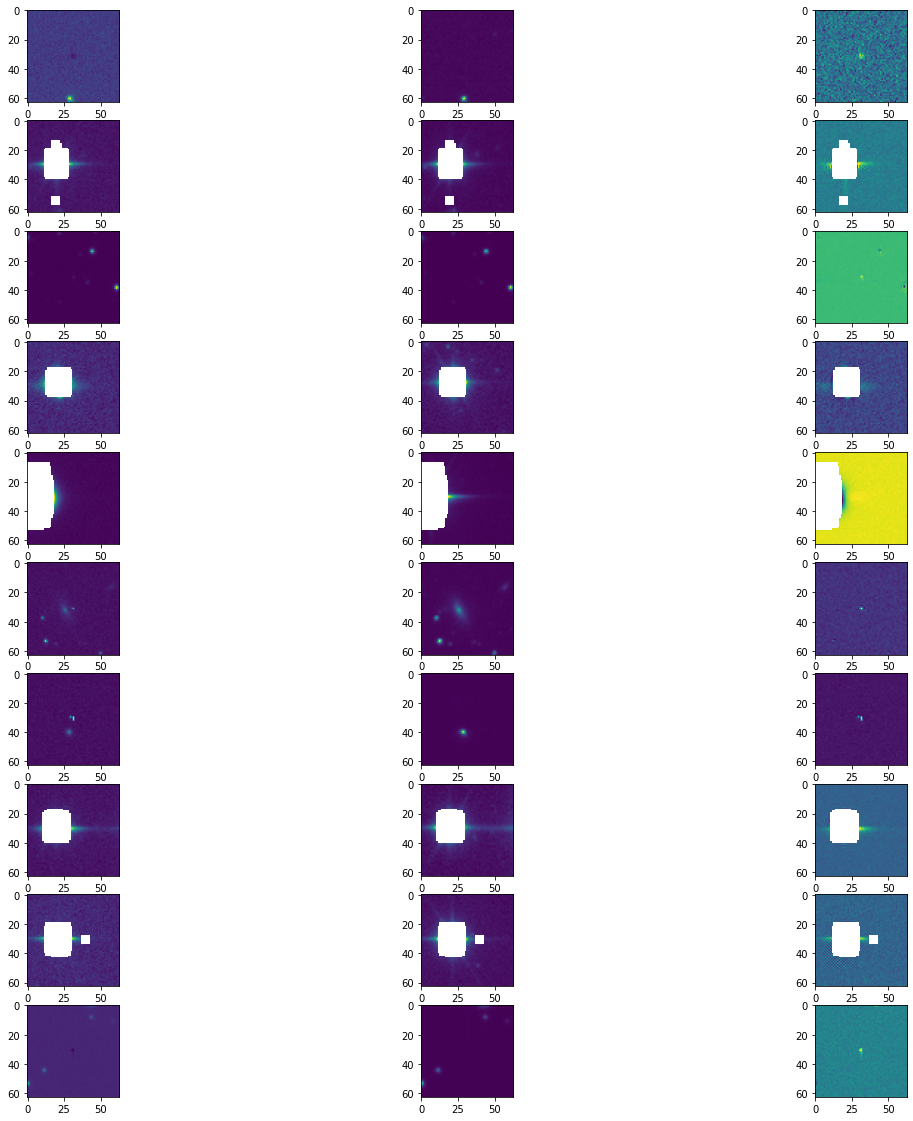

In [15]:
fig, ax = plt.subplots(ncols=3, nrows=10, figsize=(20, 20))
ax[0, 0].imshow(bogus["cutoutScience"].values[0])
ax[1, 0].imshow(bogus["cutoutScience"].values[1])
ax[2, 0].imshow(bogus["cutoutScience"].values[2])
ax[3, 0].imshow(bogus["cutoutScience"].values[3])
ax[4, 0].imshow(bogus["cutoutScience"].values[4])
ax[5, 0].imshow(bogus["cutoutScience"].values[5])
ax[6, 0].imshow(bogus["cutoutScience"].values[6])
ax[7, 0].imshow(bogus["cutoutScience"].values[7])
ax[8, 0].imshow(bogus["cutoutScience"].values[8])
ax[9, 0].imshow(bogus["cutoutScience"].values[9])
ax[0, 1].imshow(bogus["cutoutTemplate"].values[0])
ax[1, 1].imshow(bogus["cutoutTemplate"].values[1])
ax[2, 1].imshow(bogus["cutoutTemplate"].values[2])
ax[3, 1].imshow(bogus["cutoutTemplate"].values[3])
ax[4, 1].imshow(bogus["cutoutTemplate"].values[4])
ax[5, 1].imshow(bogus["cutoutTemplate"].values[5])
ax[6, 1].imshow(bogus["cutoutTemplate"].values[6])
ax[7, 1].imshow(bogus["cutoutTemplate"].values[7])
ax[8, 1].imshow(bogus["cutoutTemplate"].values[8])
ax[9, 1].imshow(bogus["cutoutTemplate"].values[9])
ax[0, 2].imshow(bogus["cutoutDifference"].values[0])
ax[1, 2].imshow(bogus["cutoutDifference"].values[1])
ax[2, 2].imshow(bogus["cutoutDifference"].values[2])
ax[3, 2].imshow(bogus["cutoutDifference"].values[3])
ax[4, 2].imshow(bogus["cutoutDifference"].values[4])
ax[5, 2].imshow(bogus["cutoutDifference"].values[5])
ax[6, 2].imshow(bogus["cutoutDifference"].values[6])
ax[7, 2].imshow(bogus["cutoutDifference"].values[7])
ax[8, 2].imshow(bogus["cutoutDifference"].values[8])
ax[9, 2].imshow(bogus["cutoutDifference"].values[9])

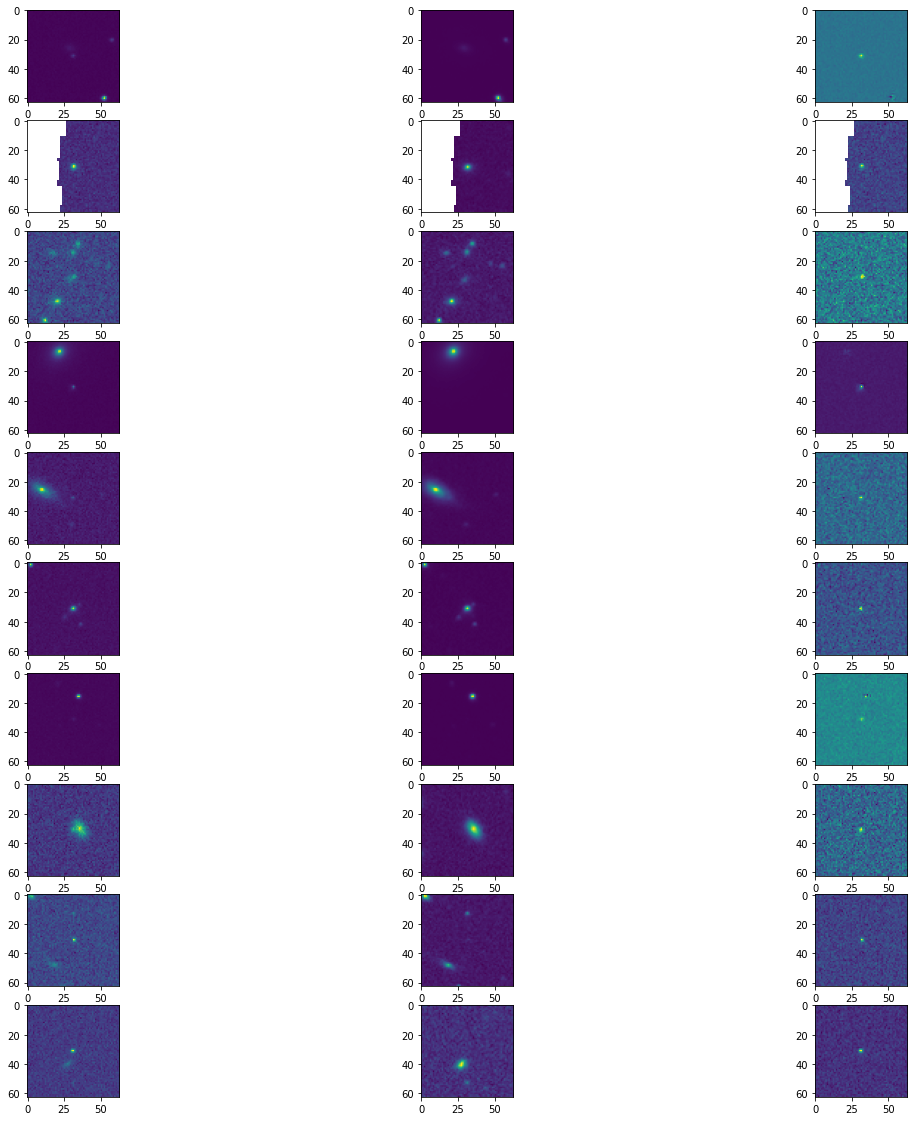

In [16]:
fig, ax = plt.subplots(ncols=3, nrows=10, figsize=(20, 20))
ax[0, 0].imshow(sn["cutoutScience"].values[0])
ax[1, 0].imshow(sn["cutoutScience"].values[1])
ax[2, 0].imshow(sn["cutoutScience"].values[2])
ax[3, 0].imshow(sn["cutoutScience"].values[3])
ax[4, 0].imshow(sn["cutoutScience"].values[4])
ax[5, 0].imshow(sn["cutoutScience"].values[5])
ax[6, 0].imshow(sn["cutoutScience"].values[6])
ax[7, 0].imshow(sn["cutoutScience"].values[7])
ax[8, 0].imshow(sn["cutoutScience"].values[8])
ax[9, 0].imshow(sn["cutoutScience"].values[9])
ax[0, 1].imshow(sn["cutoutTemplate"].values[0])
ax[1, 1].imshow(sn["cutoutTemplate"].values[1])
ax[2, 1].imshow(sn["cutoutTemplate"].values[2])
ax[3, 1].imshow(sn["cutoutTemplate"].values[3])
ax[4, 1].imshow(sn["cutoutTemplate"].values[4])
ax[5, 1].imshow(sn["cutoutTemplate"].values[5])
ax[6, 1].imshow(sn["cutoutTemplate"].values[6])
ax[7, 1].imshow(sn["cutoutTemplate"].values[7])
ax[8, 1].imshow(sn["cutoutTemplate"].values[8])
ax[9, 1].imshow(sn["cutoutTemplate"].values[9])
ax[0, 2].imshow(sn["cutoutDifference"].values[0])
ax[1, 2].imshow(sn["cutoutDifference"].values[1])
ax[2, 2].imshow(sn["cutoutDifference"].values[2])
ax[3, 2].imshow(sn["cutoutDifference"].values[3])
ax[4, 2].imshow(sn["cutoutDifference"].values[4])
ax[5, 2].imshow(sn["cutoutDifference"].values[5])
ax[6, 2].imshow(sn["cutoutDifference"].values[6])
ax[7, 2].imshow(sn["cutoutDifference"].values[7])
ax[8, 2].imshow(sn["cutoutDifference"].values[8])
ax[9, 2].imshow(sn["cutoutDifference"].values[9])

PART 3:

In [17]:
cutoutScience = df["cutoutScience"].apply(get_image_from_bytes_stamp)
cutoutTemplate = df["cutoutTemplate"].apply(get_image_from_bytes_stamp)
cutoutDifference = df["cutoutDifference"].apply(get_image_from_bytes_stamp)

In [18]:
dfn = pd.DataFrame(list(zip(cutoutScience, cutoutTemplate, cutoutDifference)), 
               columns =['cutoutScience', 'cutoutTemplate', 'cutoutDifference']) 

In [19]:
dfn.head()

,cutoutScience,cutoutTemplate,cutoutDifference
0,"[[154.62643, 146.14447, 143.38727, 146.29642, ...","[[145.16219, 147.49698, 144.5519, 145.41078, 1...","[[11.394092, -3.172372, -1.5980102, -3.9160097..."
1,"[[159.24892, 152.36958, 152.68881, 158.94447, ...","[[156.75533, 157.0148, 156.7477, 157.68335, 15...","[[0.7378049, -4.176354, -0.3905083, -0.2384278..."
2,"[[128.44151, 126.42905, 130.05313, 128.92793, ...","[[125.37153, 123.993065, 127.1723, 125.4502, 1...","[[0.37935486, 4.524002, 0.506762, 2.5218856, -..."
3,"[[276.2875, 244.38748, 285.41135, 248.76883, 2...","[[262.2147, 265.20538, 261.7715, 261.01947, 26...","[[9.129239, -14.371069, 15.190354, -4.9156623,..."
4,"[[187.2028, 182.2671, 192.7929, 191.98885, 186...","[[185.26898, 186.65602, 187.23999, 187.29695, ...","[[0.4862754, -3.7451882, 4.886872, -0.369617, ..."


In [20]:
lista=[]
for i in range(len(dfn['cutoutScience'])):
  if np.shape(dfn['cutoutScience'][i])==np.shape(dfn['cutoutTemplate'][i])==np.shape(dfn['cutoutDifference'][i])==(63,63):
    lista.append(i)

In [21]:
len(lista)

35795

In [22]:
for i in range(len(dfn['cutoutScience'])):
  dfn['cutoutScience'][i][np.isnan(dfn['cutoutScience'][i])] = np.mean(dfn['cutoutScience'][i])

In [23]:
for i in range(len(dfn['cutoutTemplate'])):
  dfn['cutoutTemplate'][i][np.isnan(dfn['cutoutTemplate'][i])] = np.mean(dfn['cutoutTemplate'][i])

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [24]:
for i in range(len(dfn['cutoutDifference'])):
  dfn['cutoutDifference'][i][np.isnan(dfn['cutoutDifference'][i])] = np.mean(dfn['cutoutDifference'][i])

In [25]:
X = np.empty([len(lista), 21, 21,3], dtype = int)
np.shape(X)

(35795, 21, 21, 3)

In [26]:
ncutoutScience = [cutoutScience[i] for i in lista]
ncutoutTemplate = [cutoutTemplate[i] for i in lista]
ncutoutDifference = [cutoutDifference[i] for i in lista]

In [27]:
for i in range(len(lista)):
  X[i,:,:,0] = ncutoutScience[i][21:42,21:42]
  X[i,:,:,1] = ncutoutTemplate[i][21:42,21:42]
  X[i,:,:,2] = ncutoutDifference[i][21:42,21:42]

In [28]:
np.shape(X)

(35795, 21, 21, 3)

In [29]:
y=[]
for i in range(len(lista)):
  y.append(df["class"][i])

In [30]:
len(y)

35795

In [31]:
dict(zip(y,map(lambda x: y.count(x),y)))

{'SN': 1079, 'AGN': 9996, 'VS': 9938, 'asteroid': 9899, 'bogus': 4883}

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y)

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [34]:
le.fit(y)
list(le.classes_)

['AGN', 'SN', 'VS', 'asteroid', 'bogus']

In [35]:
Y = le.transform(y)
y_train = le.transform(Y_train)
y_test = le.transform(Y_test)

In [36]:
X_train.shape, y_train.shape

((26846, 21, 21, 3), (26846,))

In [37]:
X_test.shape, y_test.shape

((8949, 21, 21, 3), (8949,))

PART 4:

In [38]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
tf.__version__

'2.9.2'

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(21, 21, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))

In [40]:
checkpoint_path = "training-2/cp-{epoch:04d}.ckpt" # each epoch will be saved
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test),
                    callbacks=cp_callback)

Epoch 1/10
837/839 [============================>.] - ETA: 0s - loss: 1540577388658688.0000 - accuracy: 0.4954
Epoch 1: saving model to training-2/cp-0001.ckpt
839/839 [==============================] - 22s 26ms/step - loss: 1537347036381184.0000 - accuracy: 0.4958 - val_loss: 226575379333120.0000 - val_accuracy: 0.6126
Epoch 2/10
838/839 [============================>.] - ETA: 0s - loss: 112012436701184.0000 - accuracy: 0.5795
Epoch 2: saving model to training-2/cp-0002.ckpt
839/839 [==============================] - 21s 25ms/step - loss: 111915036573696.0000 - accuracy: 0.5794 - val_loss: 94179220783104.0000 - val_accuracy: 0.5656
Epoch 3/10
838/839 [============================>.] - ETA: 0s - loss: 46215790067712.0000 - accuracy: 0.6828
Epoch 3: saving model to training-2/cp-0003.ckpt
839/839 [==============================] - 20s 24ms/step - loss: 46164145602560.0000 - accuracy: 0.6830 - val_loss: 23997955702784.0000 - val_accuracy: 0.7153
Epoch 4/10
837/839 [======================

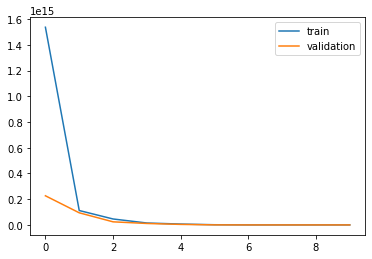

In [43]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label="train")
ax.plot(history.history['val_loss'], label="validation")
ax.legend()

In [44]:
print("Loading model %i" % (np.argmin(history.history["val_loss"]) + 1))
model.load_weights('%s/cp-%04d.ckpt' % (checkpoint_dir, np.argmin(history.history["val_loss"]) + 1))

Loading model 10


In [45]:
model.evaluate(X_test,  y_test, verbose=2)

280/280 - 2s - loss: 0.7524 - accuracy: 0.7762 - 2s/epoch - 8ms/step


[0.7524191737174988, 0.7761760950088501]

In [46]:
predictions = model.predict(X_test)

280/280 [==============================] - 3s 11ms/step


In [47]:
np.shape(predictions)

(8949, 5)

In [48]:
labeltoname = dict(zip(range(len(list(le.classes_))), list(le.classes_)))
labeltoname

{0: 'AGN', 1: 'SN', 2: 'VS', 3: 'asteroid', 4: 'bogus'}

In [49]:
len(predictions)

8949

In [50]:
cutoutScience_test = X_test[:,:,:,0]
cutoutTemplate_test = X_test[:,:,:,1]
cutoutDifference_test = X_test[:,:,:,2]
np.shape(cutoutScience_test[0])

(21, 21)

PART 5:

In [51]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [52]:
pred = np.argmax(predictions, axis=1)

Confusion matrix, without normalization


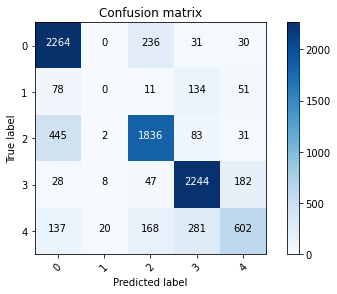

In [53]:
from sklearn.metrics import confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test, pred), range(5))

In [54]:
labelspredicted=[]
for i in range(len(pred)):
  labelspredicted.append(labeltoname[pred[i]])

In [55]:
unique, counts = np.unique(labelspredicted, return_counts=True)
dict(zip(unique, counts))

{'AGN': 2952, 'SN': 30, 'VS': 2298, 'asteroid': 2773, 'bogus': 896}

In [56]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 7435, 1: 805, 2: 7541, 3: 7390, 4: 3675}

In [57]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 2561, 1: 274, 2: 2397, 3: 2509, 4: 1208}

In [58]:
labelstest=[]
for i in range(len(y_test)):
  labelstest.append(labeltoname[y_test[i]])

In [59]:
notmatch=[]
for i in range(len(y_test)):
  if labelspredicted[i]!=labelstest[i]:
    notmatch.append(i)

In [60]:
len(notmatch)

2003

Text(0.5, 1.0, 'bogus')

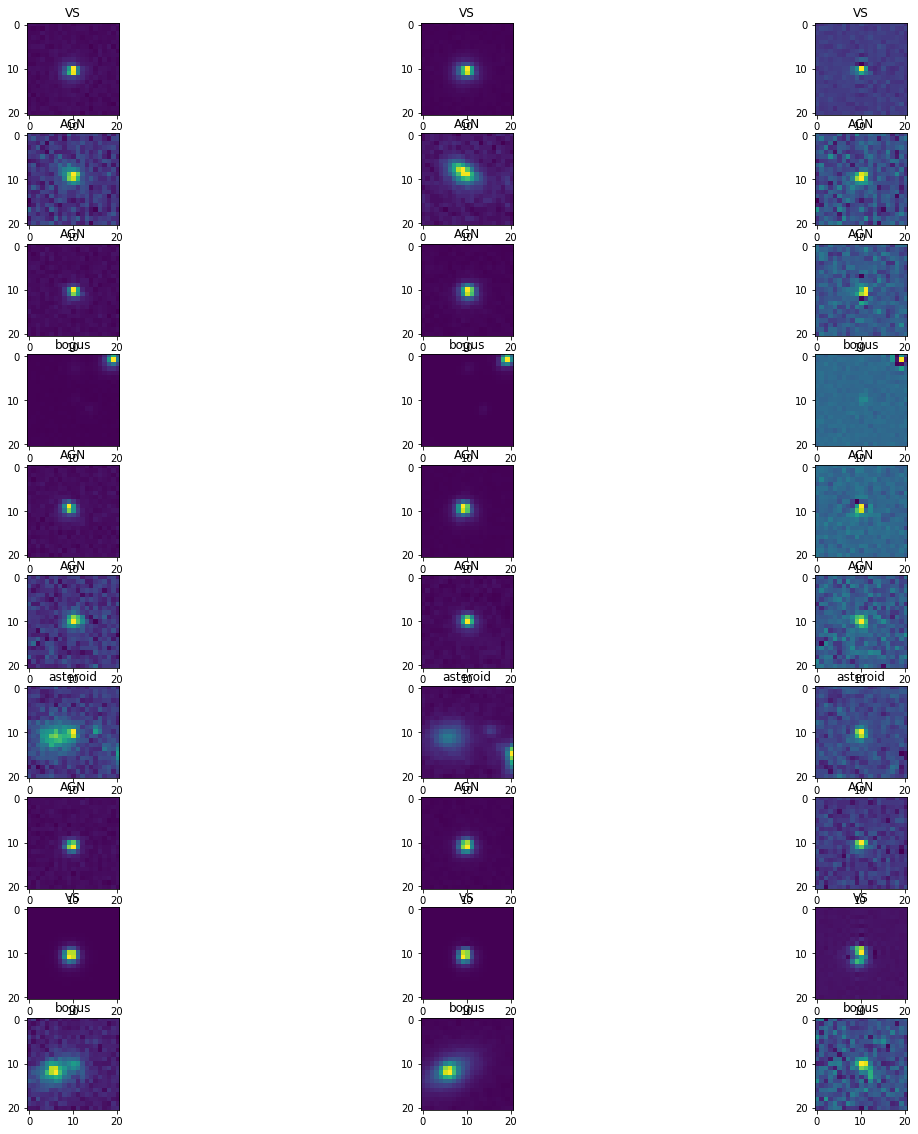

In [62]:
fig, ax = plt.subplots(ncols=3, nrows=10, figsize=(20, 20))
ax[0,0].imshow(cutoutScience_test[notmatch[1]])
ax[0,0].set_title("%s" % labelspredicted[notmatch[1]])
ax[0,1].imshow(cutoutTemplate_test[notmatch[1]])
ax[0,1].set_title("%s" % labelspredicted[notmatch[1]])
ax[0,2].imshow(cutoutDifference_test[notmatch[1]])
ax[0,2].set_title("%s" % labelspredicted[notmatch[1]])
ax[1,0].imshow(cutoutScience_test[notmatch[4]])
ax[1,0].set_title("%s" % labelspredicted[notmatch[4]])
ax[1,1].imshow(cutoutTemplate_test[notmatch[4]])
ax[1,1].set_title("%s" % labelspredicted[notmatch[4]])
ax[1,2].imshow(cutoutDifference_test[notmatch[4]])
ax[1,2].set_title("%s" % labelspredicted[notmatch[4]])
ax[2,0].imshow(cutoutScience_test[notmatch[7]])
ax[2,0].set_title("%s" % labelspredicted[notmatch[7]])
ax[2,1].imshow(cutoutTemplate_test[notmatch[7]])
ax[2,1].set_title("%s" % labelspredicted[notmatch[7]])
ax[2,2].imshow(cutoutDifference_test[notmatch[7]])
ax[2,2].set_title("%s" % labelspredicted[notmatch[7]])
ax[3,0].imshow(cutoutScience_test[notmatch[11]])
ax[3,0].set_title("%s" % labelspredicted[notmatch[11]])
ax[3,1].imshow(cutoutTemplate_test[notmatch[11]])
ax[3,1].set_title("%s" % labelspredicted[notmatch[11]])
ax[3,2].imshow(cutoutDifference_test[notmatch[11]])
ax[3,2].set_title("%s" % labelspredicted[notmatch[11]])
ax[4,0].imshow(cutoutScience_test[notmatch[15]])
ax[4,0].set_title("%s" % labelspredicted[notmatch[15]])
ax[4,1].imshow(cutoutTemplate_test[notmatch[15]])
ax[4,1].set_title("%s" % labelspredicted[notmatch[15]])
ax[4,2].imshow(cutoutDifference_test[notmatch[15]])
ax[4,2].set_title("%s" % labelspredicted[notmatch[15]])
ax[5,0].imshow(cutoutScience_test[notmatch[18]])
ax[5,0].set_title("%s" % labelspredicted[notmatch[18]])
ax[5,1].imshow(cutoutTemplate_test[notmatch[18]])
ax[5,1].set_title("%s" % labelspredicted[notmatch[18]])
ax[5,2].imshow(cutoutDifference_test[notmatch[18]])
ax[5,2].set_title("%s" % labelspredicted[notmatch[18]])
ax[6,0].imshow(cutoutScience_test[notmatch[22]])
ax[6,0].set_title("%s" % labelspredicted[notmatch[22]])
ax[6,1].imshow(cutoutTemplate_test[notmatch[22]])
ax[6,1].set_title("%s" % labelspredicted[notmatch[22]])
ax[6,2].imshow(cutoutDifference_test[notmatch[22]])
ax[6,2].set_title("%s" % labelspredicted[notmatch[22]])
ax[7,0].imshow(cutoutScience_test[notmatch[25]])
ax[7,0].set_title("%s" % labelspredicted[notmatch[25]])
ax[7,1].imshow(cutoutTemplate_test[notmatch[25]])
ax[7,1].set_title("%s" % labelspredicted[notmatch[25]])
ax[7,2].imshow(cutoutDifference_test[notmatch[25]])
ax[7,2].set_title("%s" % labelspredicted[notmatch[25]])
ax[8,0].imshow(cutoutScience_test[notmatch[29]])
ax[8,0].set_title("%s" % labelspredicted[notmatch[29]])
ax[8,1].imshow(cutoutTemplate_test[notmatch[29]])
ax[8,1].set_title("%s" % labelspredicted[notmatch[29]])
ax[8,2].imshow(cutoutDifference_test[notmatch[29]])
ax[8,2].set_title("%s" % labelspredicted[notmatch[29]])
ax[9,0].imshow(cutoutScience_test[notmatch[33]])
ax[9,0].set_title("%s" % labelspredicted[notmatch[33]])
ax[9,1].imshow(cutoutTemplate_test[notmatch[33]])
ax[9,1].set_title("%s" % labelspredicted[notmatch[33]])
ax[9,2].imshow(cutoutDifference_test[notmatch[33]])
ax[9,2].set_title("%s" % labelspredicted[notmatch[33]])

PART 6:

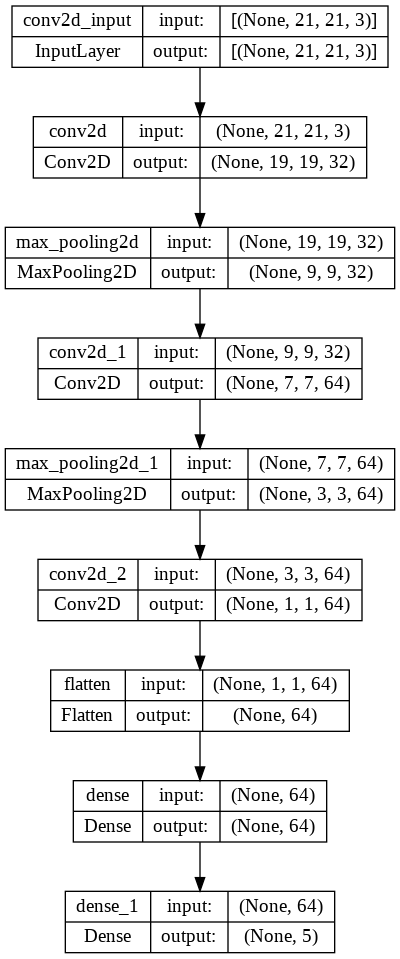

In [63]:
tf.keras.utils.plot_model(model, show_shapes=True)

Train Image:

VS


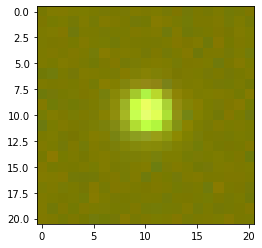

In [80]:
idx = 240
print(labeltoname[y_train[idx]])
plt.imshow(X_train[idx])

Network with the intermediate layers as outputs:

In [81]:
layer_outputs = [layer.output for layer in model.layers] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

Output of the image:

In [82]:
activations = activation_model.predict(np.expand_dims(X_train[idx], axis=0))

1/1 [==============================] - 0s 93ms/step


Number of outputs:

In [83]:
len(activations)

8

Model Summary:

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 19, 19, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 64)                0

Shape of the outputs of all the layers of the network:

In [85]:
for i in range(len(activations)): 
  print(activations[i].shape)

(1, 19, 19, 32)
(1, 9, 9, 32)
(1, 7, 7, 64)
(1, 3, 3, 64)
(1, 1, 1, 64)
(1, 64)
(1, 64)
(1, 5)


We will be able to plot images when the output has 1 dimension (up to the 5th activation), beacuse after that, all the images are flattened.

Plot of the first 10 filters for each of the outputs before:

(1, 19, 19, 32)
(1, 9, 9, 32)
(1, 7, 7, 64)
(1, 3, 3, 64)
(1, 1, 1, 64)


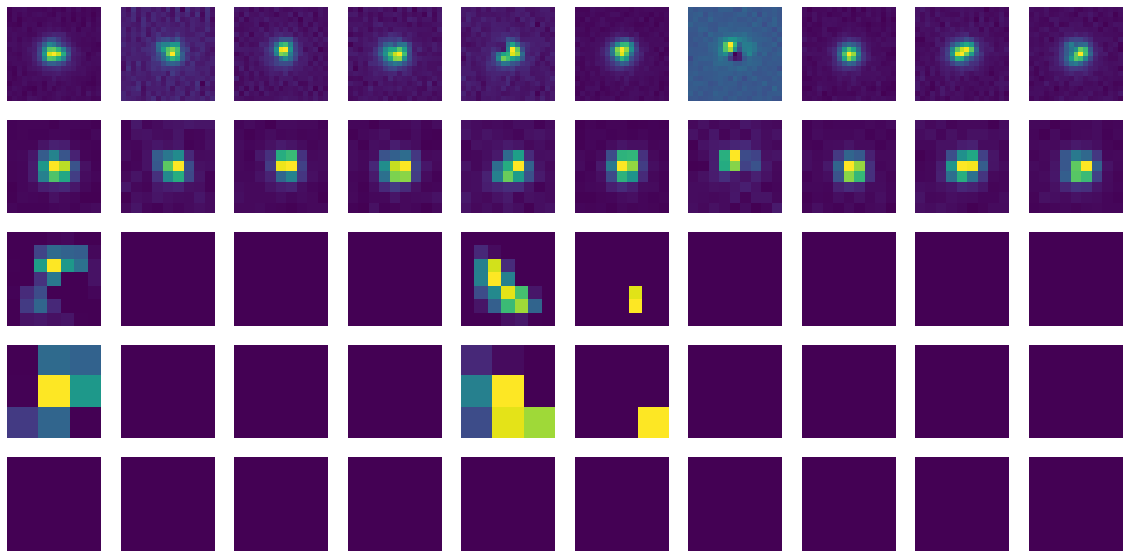

In [86]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(20, 10))
for i in range(5): 
  print(activations[i].shape)
  for j in range(10):
    ax[i, j].imshow(activations[i][0, :, :, j], cmap='viridis')
    ax[i, j].axis(False)

We can see from the images above, that every convolutional layer of the notwork changes the pattern of what we see in the images, and all the maxpooling layers, only improve the resolution and in certain way it makes a zoom of the images, so we can see the pattern a little bit clearer.

Convolutional Kernels:

0 (3, 3, 3, 32)
Not a convolutional layer
2 (3, 3, 32, 64)
Not a convolutional layer
4 (3, 3, 64, 64)


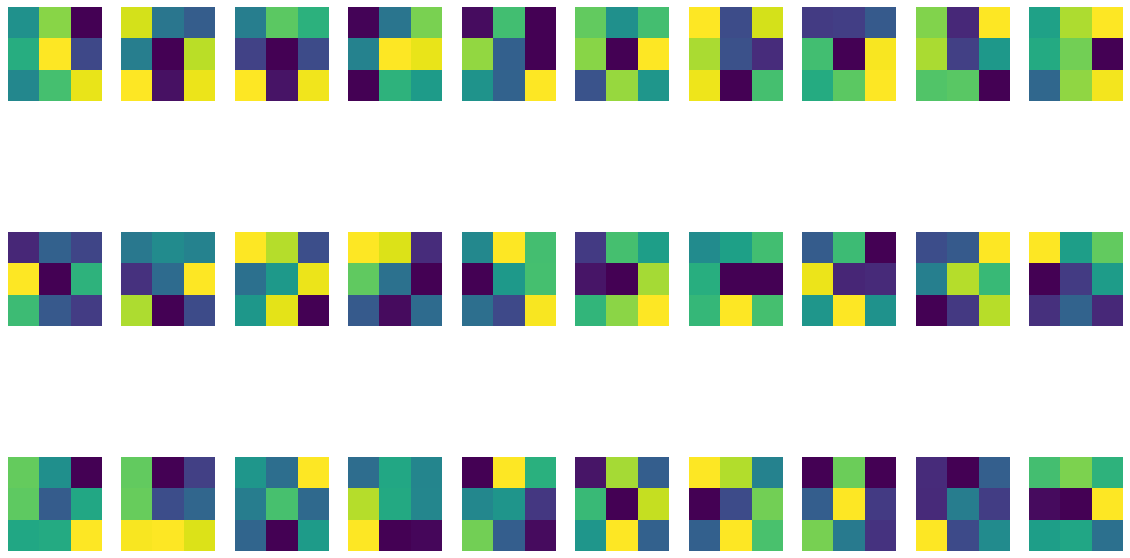

In [91]:
fig, ax = plt.subplots(nrows=5, ncols=10, figsize=(20, 10))
for i in range(5): 
  try:
    print(i, model.layers[i].kernel.shape)
  except:
    print("Not a convolutional layer")
  for j in range(10):
      ax[i, j].axis(False)
      try: 
        kernel = model.layers[i].kernel[:, :, 0, j]
        ax[i, j].matshow(kernel, cmap='viridis')
      except:
        continue